In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Fish.csv")

In [ ]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [ ]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
data.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [ ]:
#create a columns tranformer
ct = make_column_transformer(
    (MinMaxScaler(),['Length1','Length2','Length3']), #turn all values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["Species"])
)
#create X and y values
X =   data.drop("Weight",axis=1)
y = data['Weight']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((135, 6), (24, 6), (135,), (24,))

In [ ]:
#fit the column transformer to our data
ct.fit(x_train)
X_train_normal = ct.transform(x_train)
X_test_normal = ct.transform(x_test)

In [ ]:
X_train_normal.shape

(135, 10)

In [ ]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

#1.build a mode
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(100),
                         #           tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(50),
                            #        tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10),
#                                                              tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Dense(1)
            ])
#2. compile a model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss=tf.keras.losses.mae,
              metrics=["mae","mse"])
#3.fit a model
history = model.fit(X_train_normal,y_train,epochs=300,callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
5/5 [==============================] - 0s 3ms/step - loss: 384.6469 - mae: 384.6469 - mse: 273024.4688
Epoch 2/300
5/5 [==============================] - 0s 3ms/step - loss: 365.5030 - mae: 365.5030 - mse: 253742.4062
Epoch 3/300
5/5 [==============================] - 0s 3ms/step - loss: 303.6702 - mae: 303.6702 - mse: 194868.3281
Epoch 4/300
5/5 [==============================] - 0s 3ms/step - loss: 218.4982 - mae: 218.4982 - mse: 94368.1406
Epoch 5/300
5/5 [==============================] - 0s 5ms/step - loss: 222.9973 - mae: 222.9973 - mse: 64849.2305
Epoch 6/300
5/5 [==============================] - 0s 3ms/step - loss: 188.0180 - mae: 188.0180 - mse: 66087.6172
Epoch 7/300
5/5 [==============================] - 0s 3ms/step - loss: 177.2041 - mae: 177.2041 - mse: 82278.9844
Epoch 8/300
5/5 [==============================] - 0s 4ms/step - loss: 159.2604 - mae: 159.2604 - mse: 63937.0898
Epoch 9/300
5/5 [==============================] - 0s 5ms/step - loss: 147.8784 - mae

In [ ]:
#evaluation
model.evaluate(X_test_normal,y_test)

1/1 [==============================] - 0s 114ms/step - loss: 56.0078 - mae: 56.0078 - mse: 6187.2070


[56.00779342651367, 56.00779342651367, 6187.20703125]

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_78 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_79 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 11        
Total params: 6,671
Trainable params: 6,671
Non-trainable params: 0
_________________________________________________________________


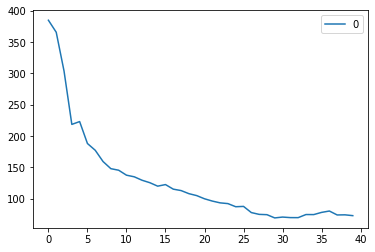

In [ ]:
pd.DataFrame(history.history["mae"]).plot()

In [ ]:
pred = model.predict(X_test_normal)

In [ ]:
len(X_test_normal)

24

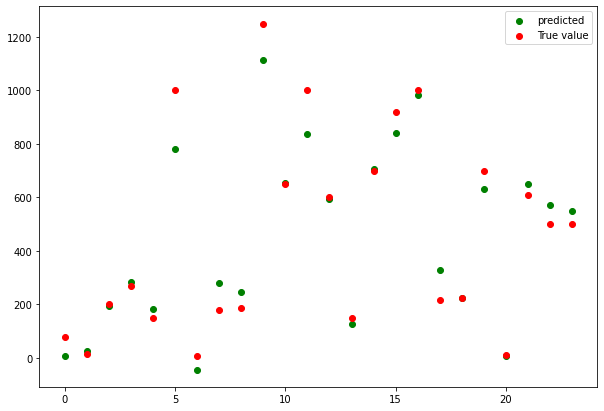

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.scatter(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()
plt.show()


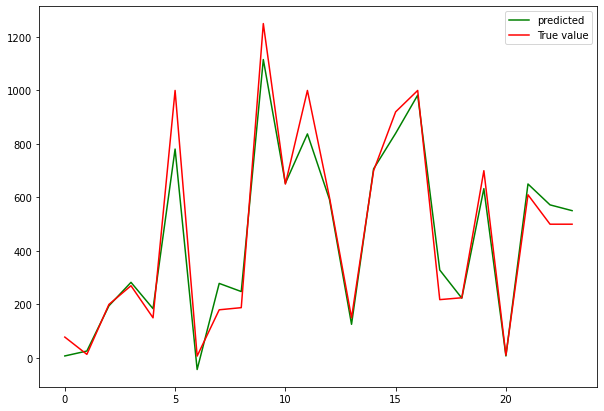

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.plot(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()
plt.show()
